# 5 ways to update plot appearance with `rcParams`

Appendix code to PyCon 2024 poster.

## Imports

In [1]:
from cycler import cycler

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

## See all available `rcParams`

In [2]:
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

## `rcParams` are `dict`-like structure

In [3]:
type(mpl.rcParams)

matplotlib.RcParams

In [4]:
isinstance(mpl.rcParams, dict)

True

## Define demo plot

In [7]:
def my_plot(title, x, *ys):
    _, ax = plt.subplots(
        figsize=(16, 9),
        layout="constrained"
    )

    for i, y in enumerate(ys, start=1):
        ax.plot(x, y, label=f"Plot {i}")

    ax.set(
        title=f"{title}",
        xlabel="x",
        ylabel="y"
    )
    ax.legend()

## Data

In [8]:
nr_of_samples = 1000

t = np.linspace(0, 23, nr_of_samples)


A = np.sin(np.linspace(0, 2*np.pi, nr_of_samples))
y1 = A*np.sin(2*np.pi*t)
y2 = 8*A*np.sin(2*np.pi*t)
y3 = -A*np.sin(2*np.pi*t)

## Default plot test

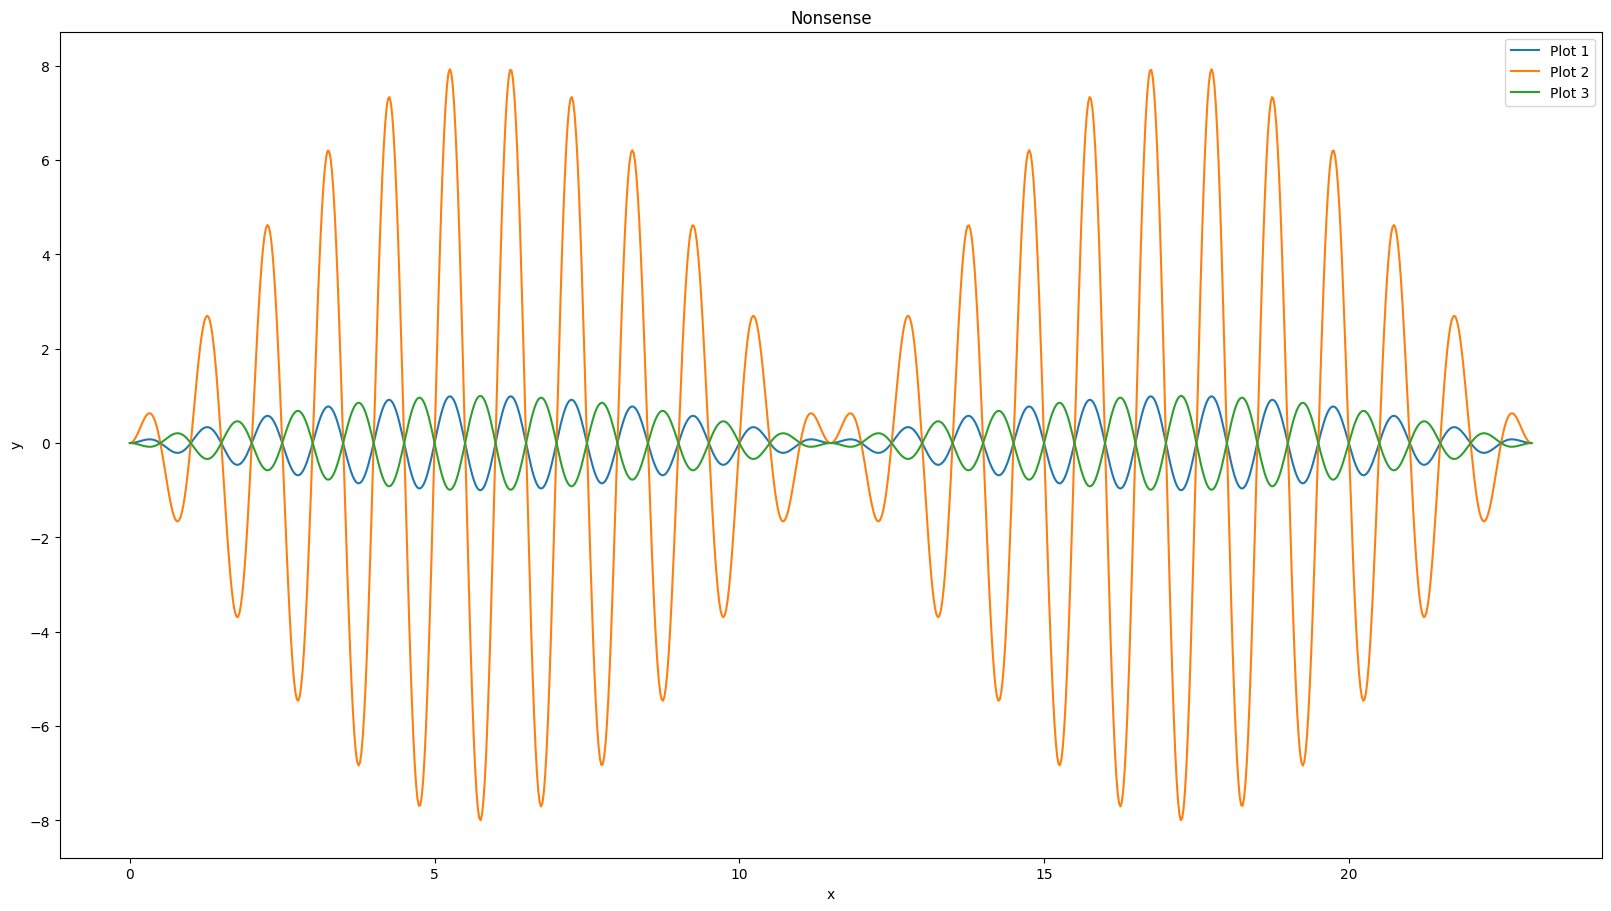

In [9]:
# Default plot
my_plot("Nonsense", t, y1, y2, y3)

## 1. Update parameters directly

In [10]:
mpl.rcParams["figure.facecolor"] = "#ffffff"  # white

mpl.rcParams["font.size"] = 16

# Axes settings
mpl.rcParams["axes.facecolor"] = "#effeec"  # bright green
mpl.rcParams["axes.grid"] = True
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.titlesize"] = 25
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlepad"] = 12
mpl.rcParams["axes.spines.left"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.bottom"] = False
mpl.rcParams["axes.prop_cycle"] = cycler(  # Update colours in the cycler
    color=[
        "#e01b24",  # red
        "#3584e4",  # blue
        "#26a269",  # green
        "#c061cb",  # purple
        "#986a44"  # brown
    ]
)

# Hide ticks on both axis
mpl.rcParams["xtick.bottom"] = False
mpl.rcParams["ytick.left"] = False

# Grid settings
mpl.rcParams["grid.color"] = "#ffffff"  # white
mpl.rcParams["grid.linewidth"] = 2

# Legend settings
mpl.rcParams["legend.frameon"] = False

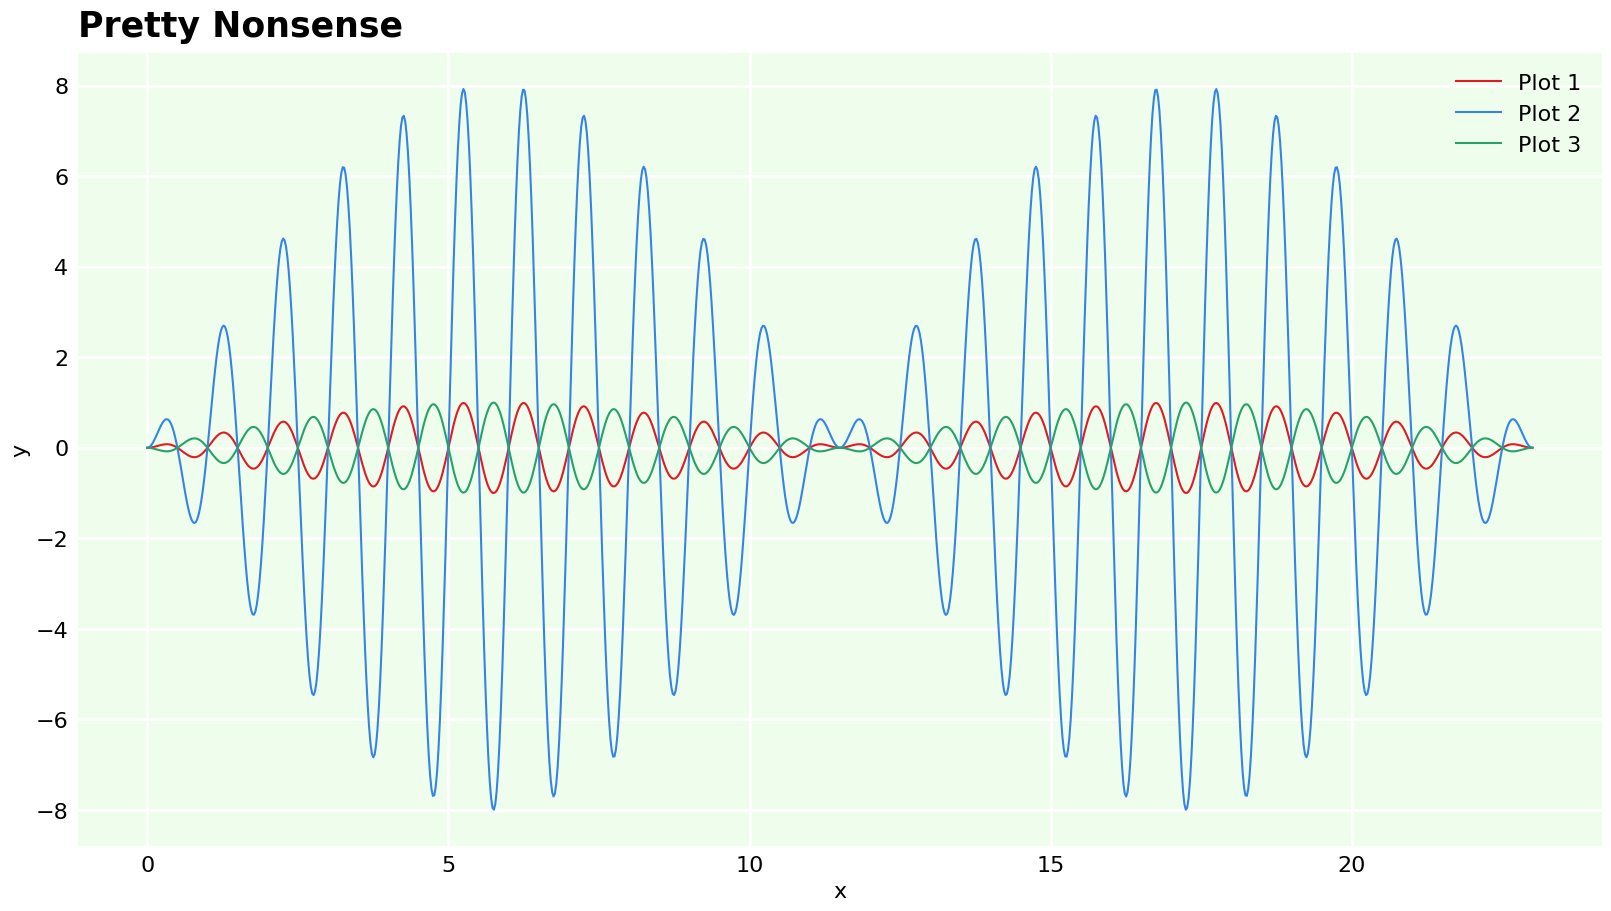

In [11]:
# Test new settings
my_plot("Pretty Nonsense", t, y1, y2, y3)

### Call any new plot

<BarContainer object of 3 artists>

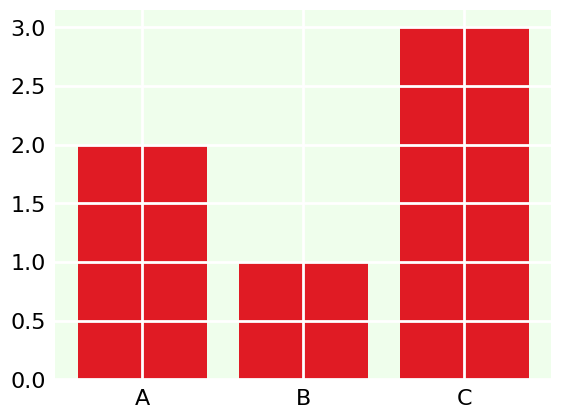

In [12]:
fig, ax = plt.subplots()
ax.bar(
    x=list("ABC"),
    height=[2, 1, 3]
)

In [13]:
# Reset settings
mpl.rcdefaults()

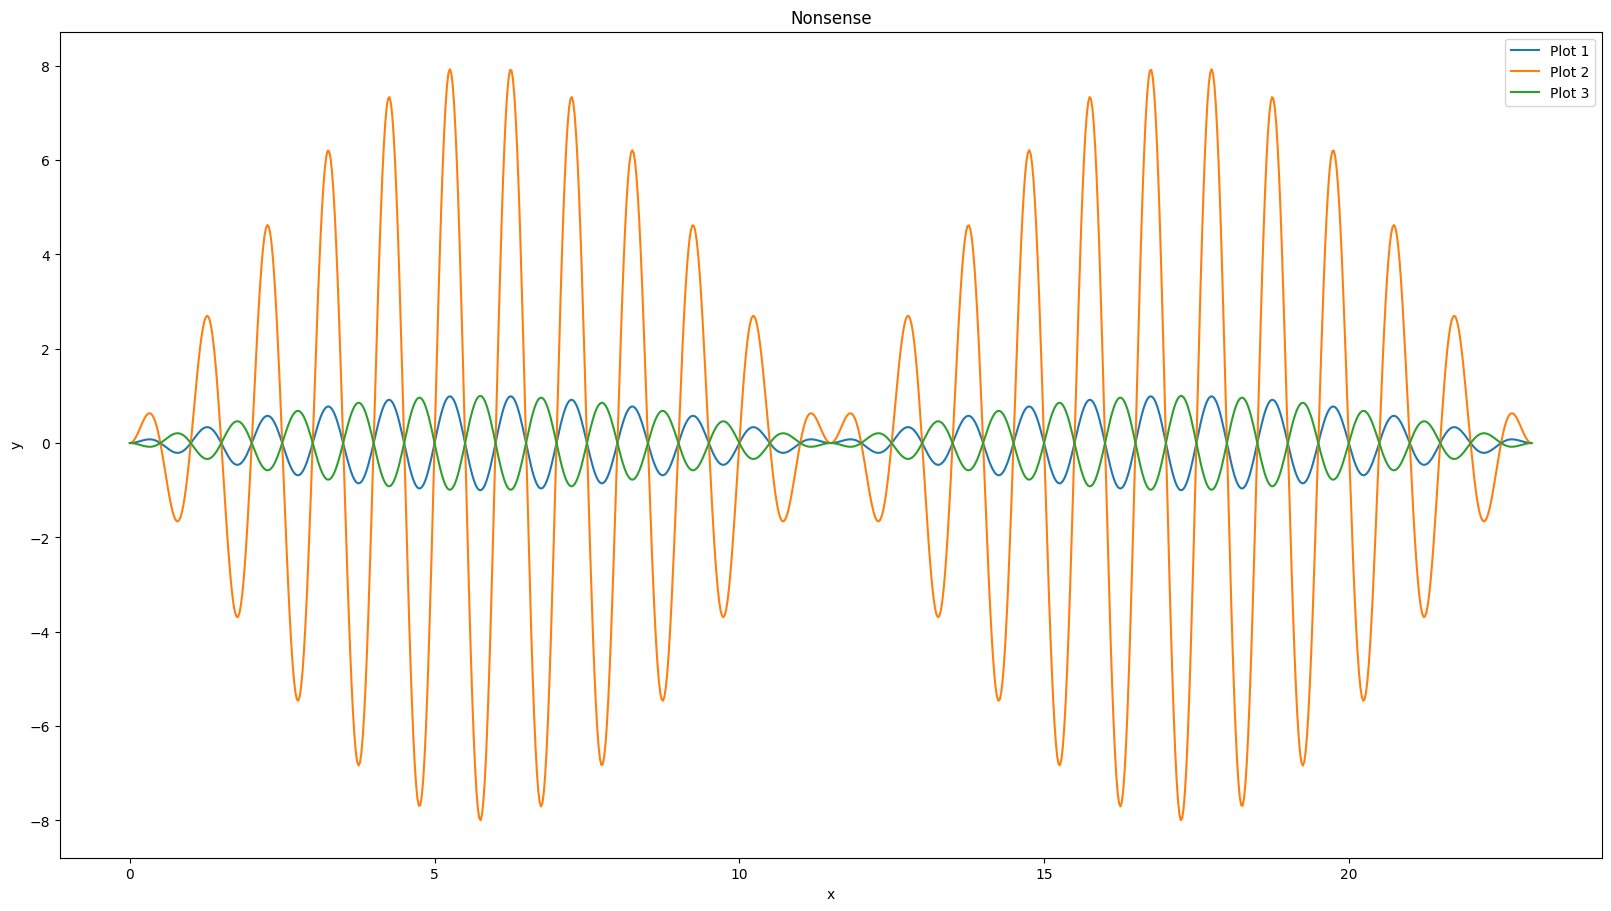

In [14]:
# Test that the plot is back to the default settings
my_plot("Nonsense", t, y1, y2, y3)

## 2. Use `dict` `update` method

### Pass new values directly

In [15]:
mpl.rcParams.update(
    {
        "figure.facecolor": "#ffffff",  # white
        "font.size": 16,
        "axes.facecolor": "#effeec",
        "axes.grid": True,
        "axes.titlelocation": "left",
        "axes.titlesize": 25,
        "axes.titlepad": 12,
        "axes.spines.left": False,
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.spines.bottom": False,
        "axes.prop_cycle": cycler(
            color=[
                "#e01b24",  # red
                "#3584e4",  # blue
                "#26a269",  # green
                "#c061cb",  # purple
                "#986a44"  # brown
            ]
        ),
        "xtick.bottom": False,
        "ytick.left": False,
        "grid.color": "#ffffff",  # white
        "grid.linewidth": 2,
        "legend.frameon": False
    }
)

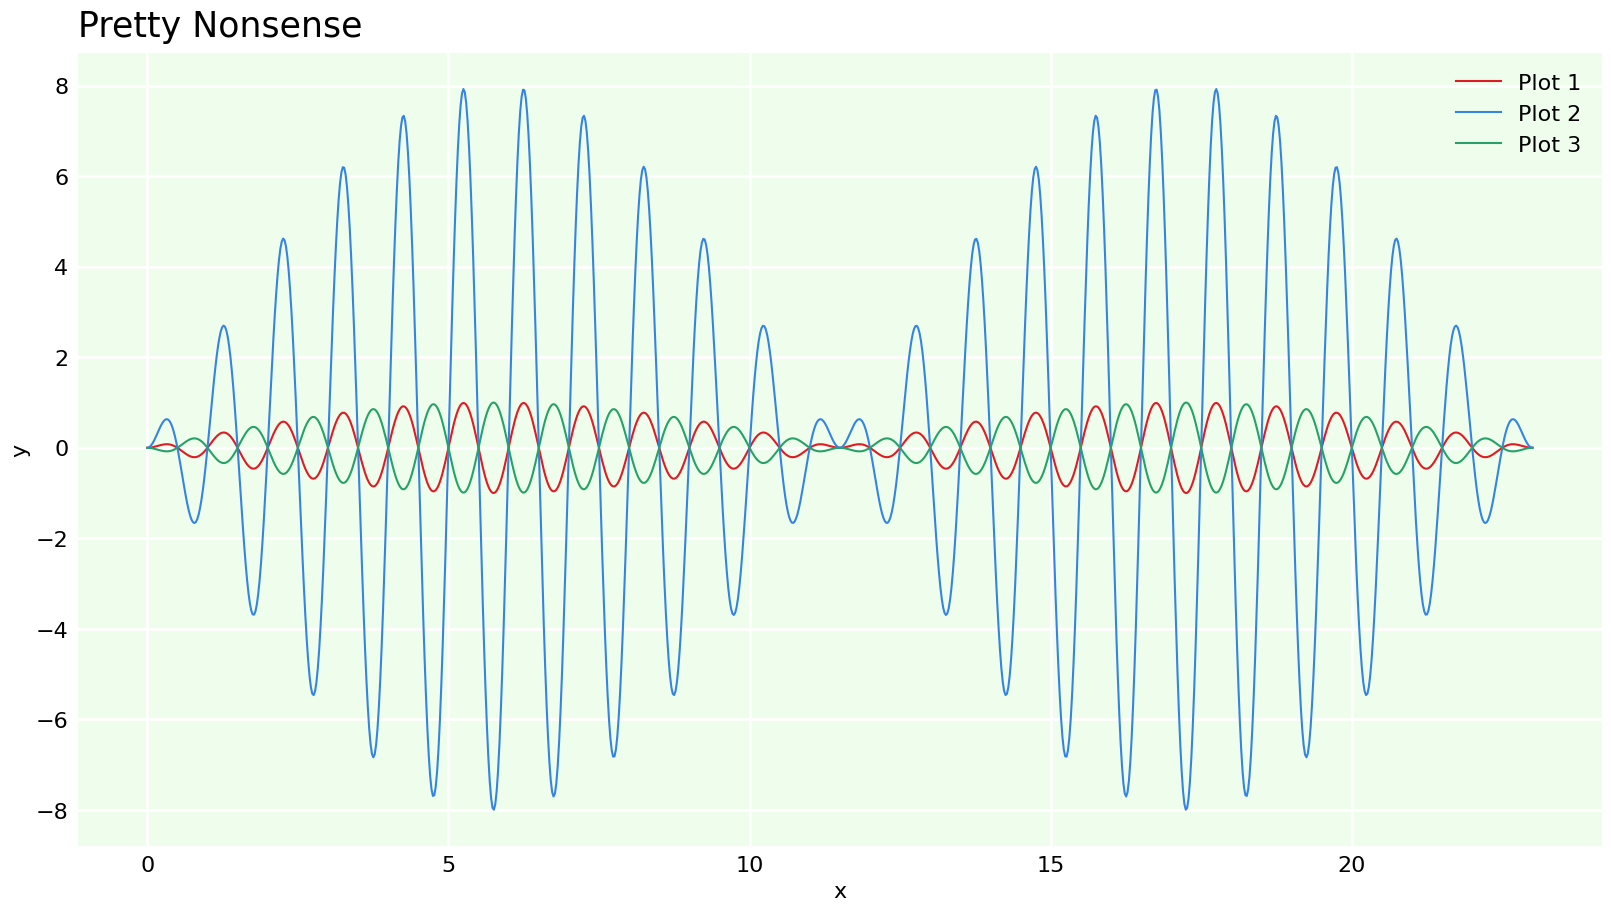

In [16]:
# Test new settings
my_plot("Pretty Nonsense", t, y1, y2, y3)

In [17]:
# reset settings
mpl.rcdefaults()

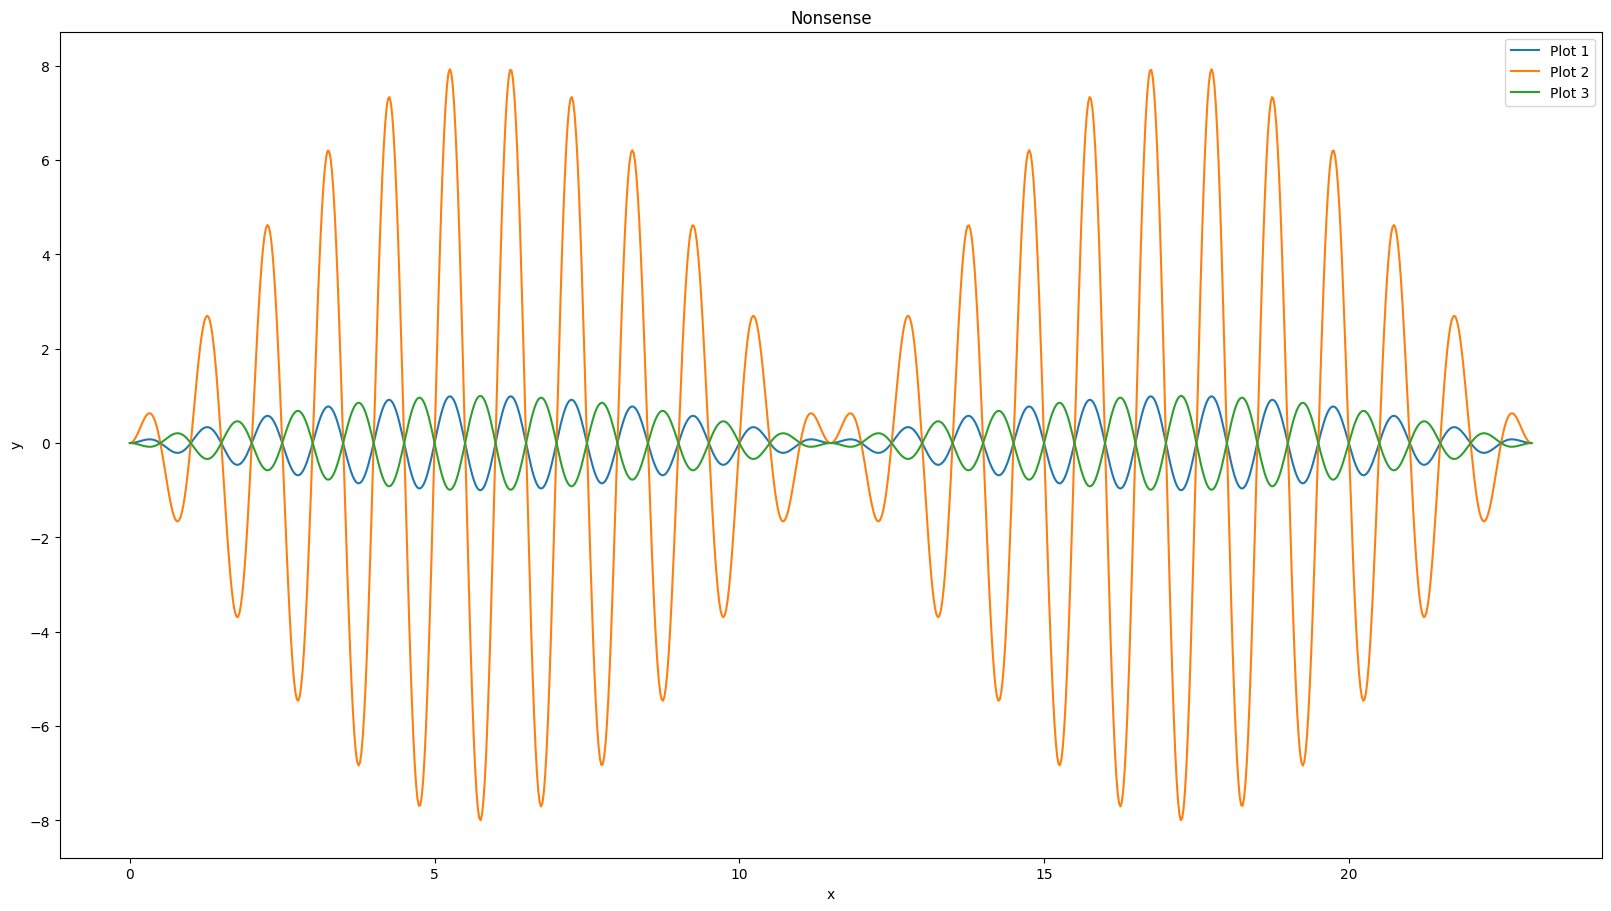

In [18]:
# Test that the plot is back to the default settings
my_plot("Nonsense", t, y1, y2, y3)

### Pass `dict` variable with new values to `.update()`

In [19]:
new_values = {
    "figure.facecolor": "#ffffff",  # white
    "font.size": 16,
    "axes.facecolor": "#effeec",
    "axes.grid": True,
    "axes.titlelocation": "left",
    "axes.titlesize": 25,
    "axes.titlepad": 12,
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.spines.bottom": False,
    "axes.prop_cycle": cycler(
        color=[
            "#e01b24",  # red
            "#3584e4",  # blue
            "#26a269",  # green
            "#c061cb",  # purple
            "#986a44"  # brown
        ]
    ),
    "xtick.bottom": False,
    "ytick.left": False,
    "grid.color": "#ffffff",  # white
    "grid.linewidth": 2,
    "legend.frameon": False
}

mpl.rcParams.update(new_values)

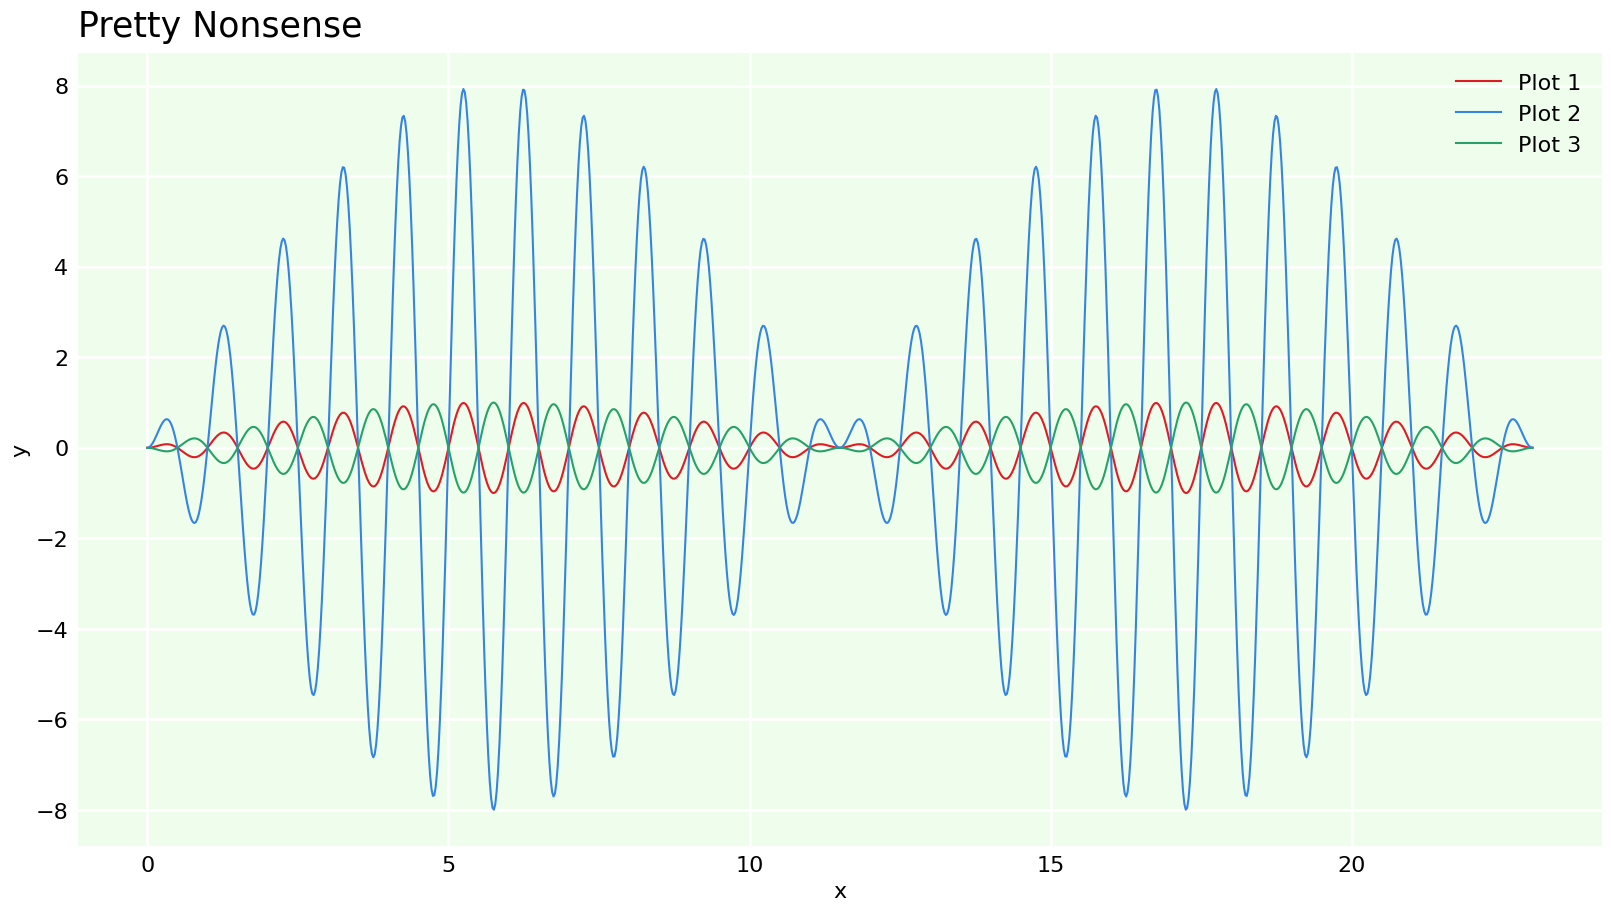

In [20]:
# Test new settings
my_plot("Pretty Nonsense", t, y1, y2, y3)

In [21]:
# reset settings
mpl.rcdefaults()

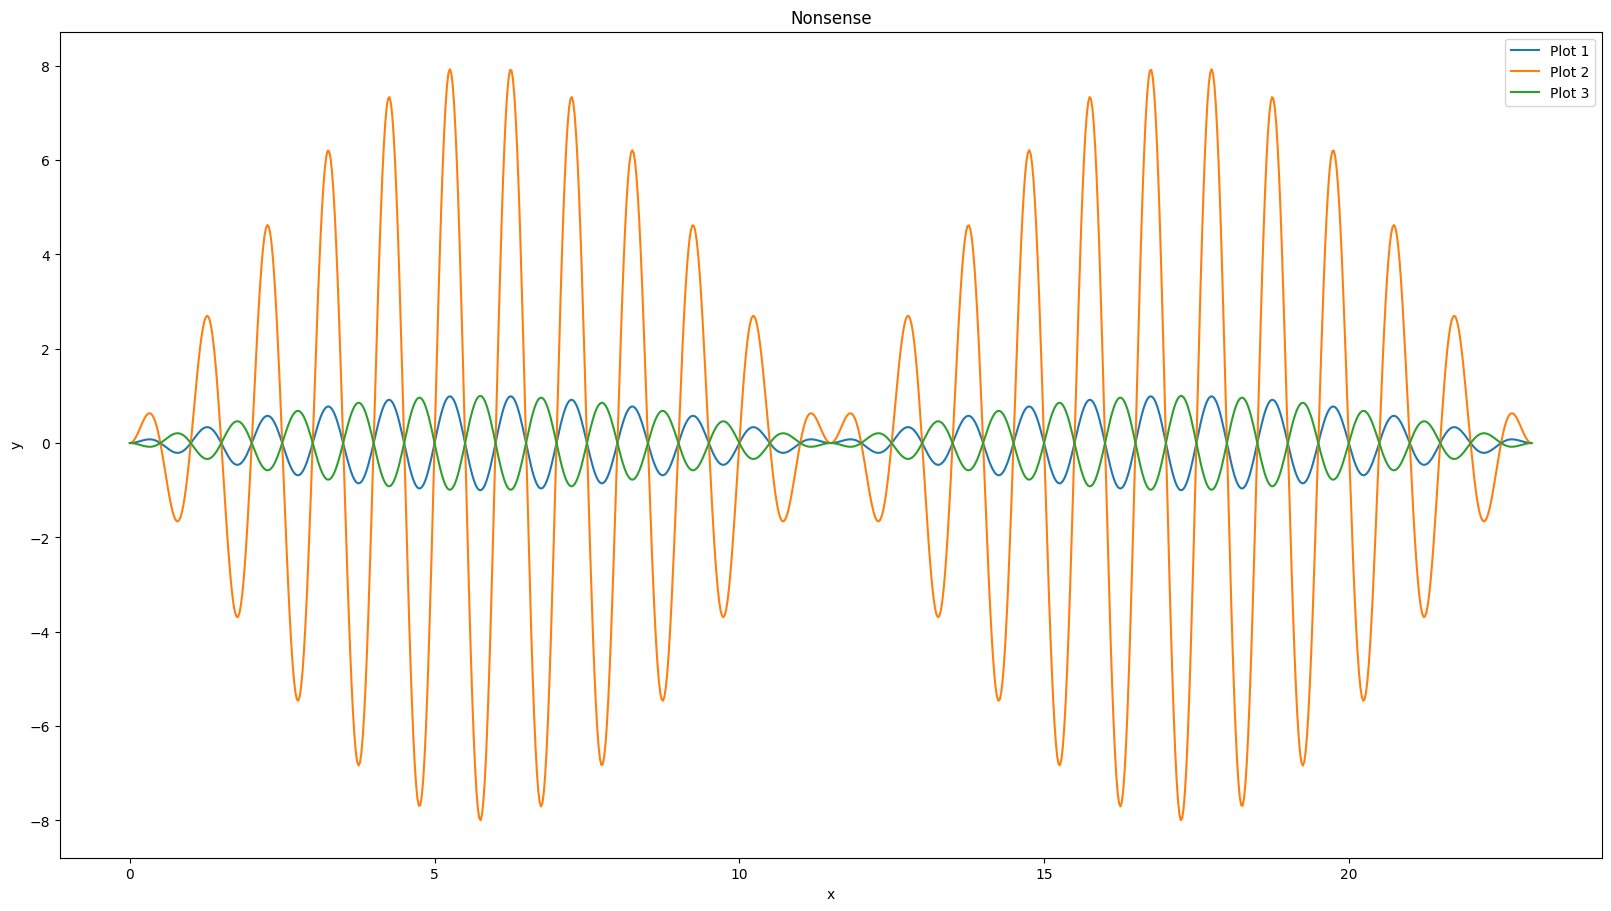

In [22]:
# Test that the plot is back to the default settings
my_plot("Nonsense", t, y1, y2, y3)

## 3. Use `.rc` convenience function to update groups of properties

https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rc

In [23]:
mpl.rc(
    "figure",
    facecolor="#ffffff"  # white
)
mpl.rc(
    "font",
    size=16
)
mpl.rc(
    "axes",
    facecolor="#effeec",  # bright green,
    grid=True,
    titlelocation="left",
    titlesize=25,
    titlepad=12,
    prop_cycle=cycler(  # Update colours in the cycler
        color=[
            "#e01b24",  # red
            "#3584e4",  # blue
            "#26a269",  # green
            "#c061cb",  # purple
            "#986a44"  # brown
        ]
    )
)
mpl.rc(
    "axes.spines",
    left=False,
    right=False,
    top=False,
    bottom=False
)
mpl.rc(
    "xtick",
    bottom=False
)
mpl.rc(
    "ytick",
    left=False
)
mpl.rc(
    "grid",
    c="#ffffff",  # white
    lw=2
)
mpl.rc(
    "legend",
    frameon=False
)

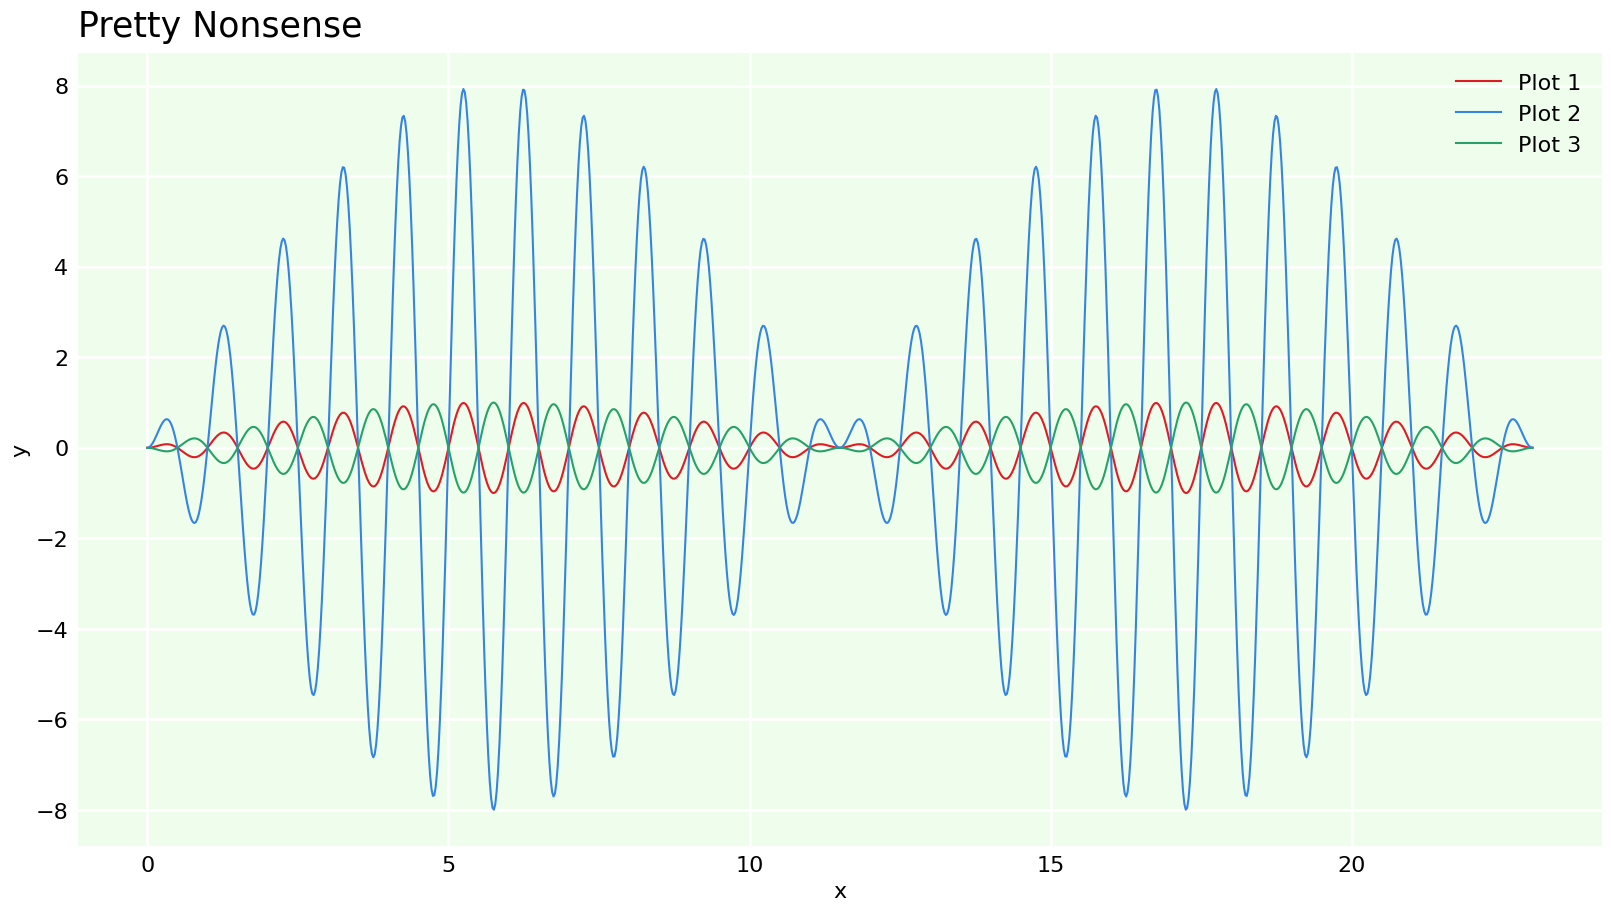

In [24]:
my_plot("Pretty Nonsense", t, y1, y2, y3)

In [25]:
# Reset settings
mpl.rcdefaults()

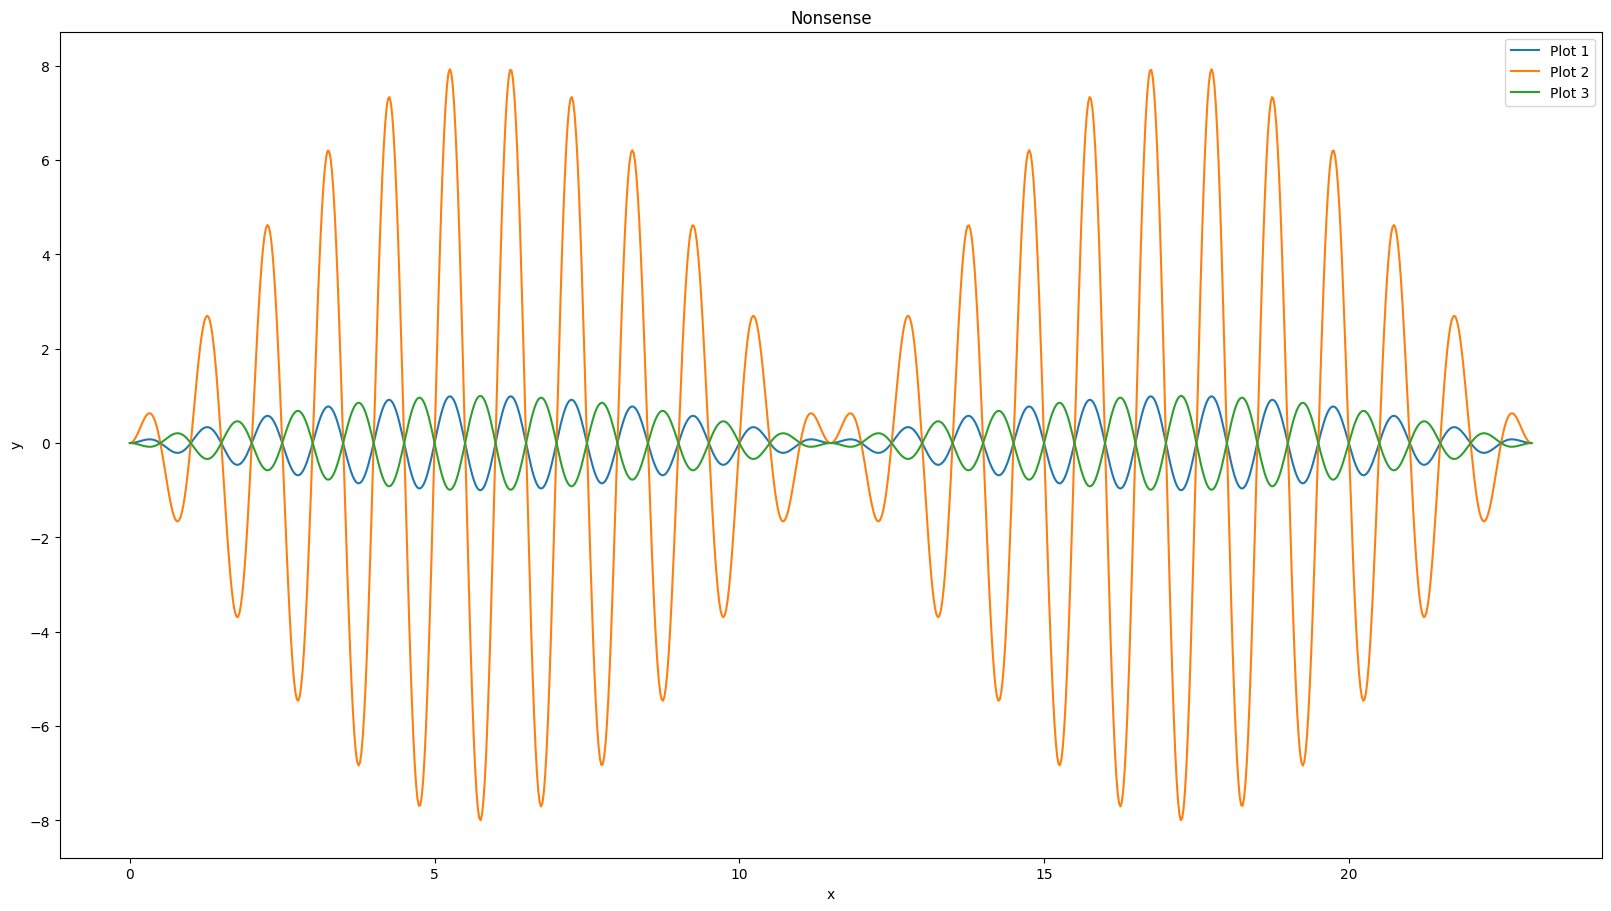

In [26]:
# Test that the plot is back to the default settings
my_plot("Nonsense", t, y1, y2, y3)

## 4a Use context manager

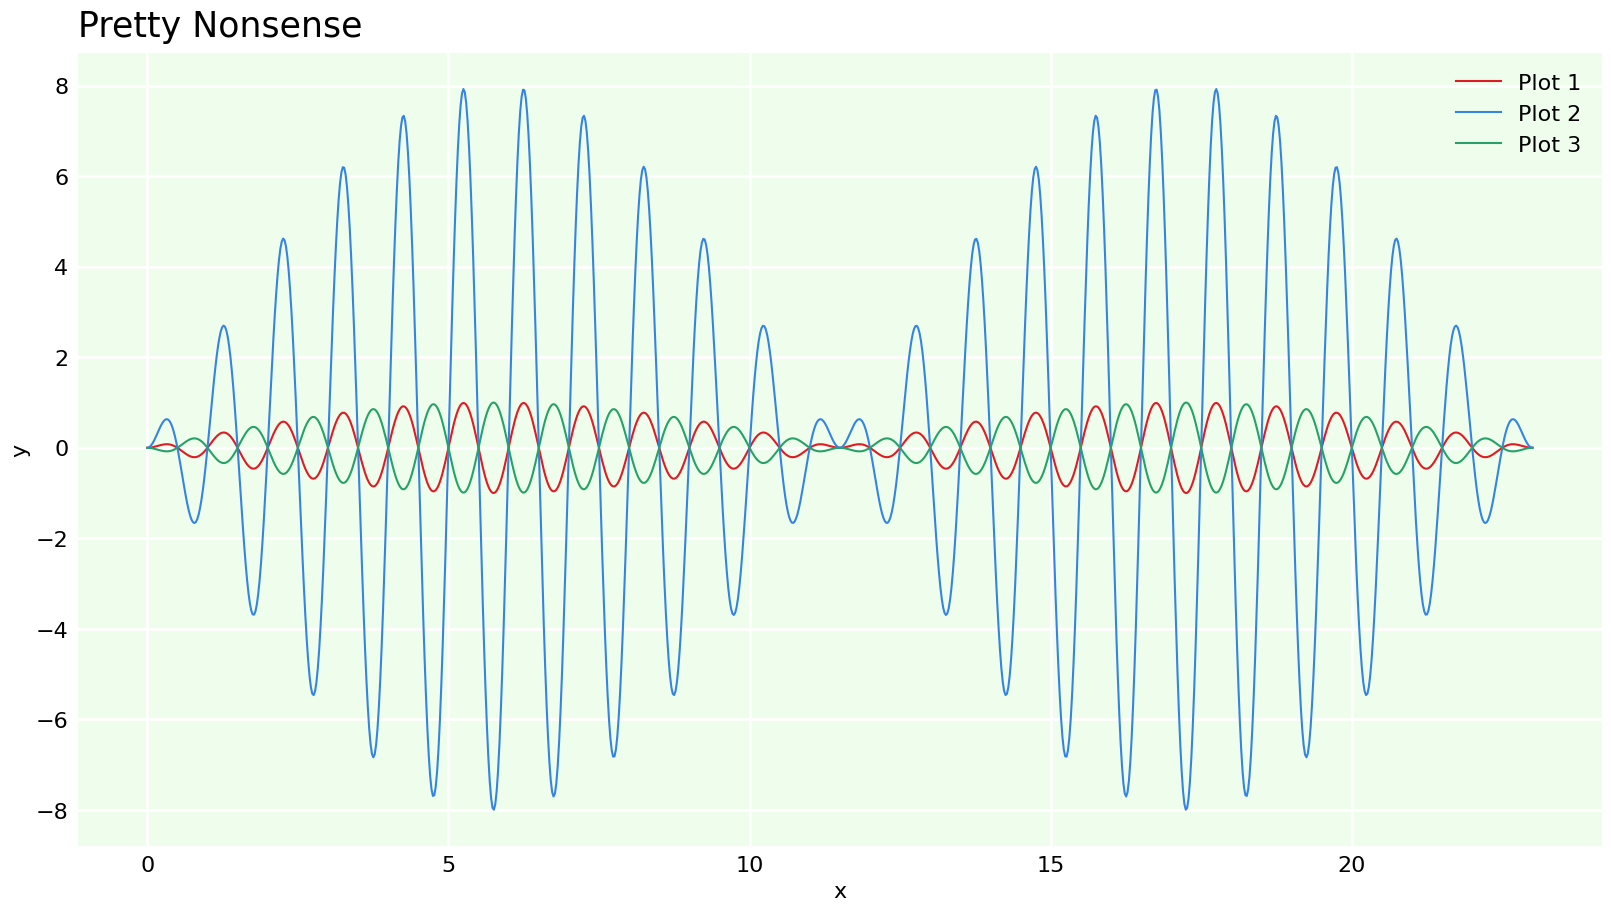

In [27]:
with mpl.rc_context(
    {
        "figure.facecolor": "#ffffff",  # white
        "font.size": 16,
        "axes.facecolor": "#effeec",
        "axes.grid": True,
        "axes.titlelocation": "left",
        "axes.titlesize": 25,
        "axes.titlepad": 12,
        "axes.spines.left": False,
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.spines.bottom": False,
        "axes.prop_cycle": cycler(
            color=[
                "#e01b24",  # red
                "#3584e4",  # blue
                "#26a269",  # green
                "#c061cb",  # purple
                "#986a44"  # brown
            ]
        ),
        "xtick.bottom": False,
        "ytick.left": False,
        "grid.color": "#ffffff",  # white
        "grid.linewidth": 2,
        "legend.frameon": False
    }
):
    my_plot("Pretty Nonsense", t, y1, y2, y3)

In [28]:
# No need to reset as we're out of the `context manager` now

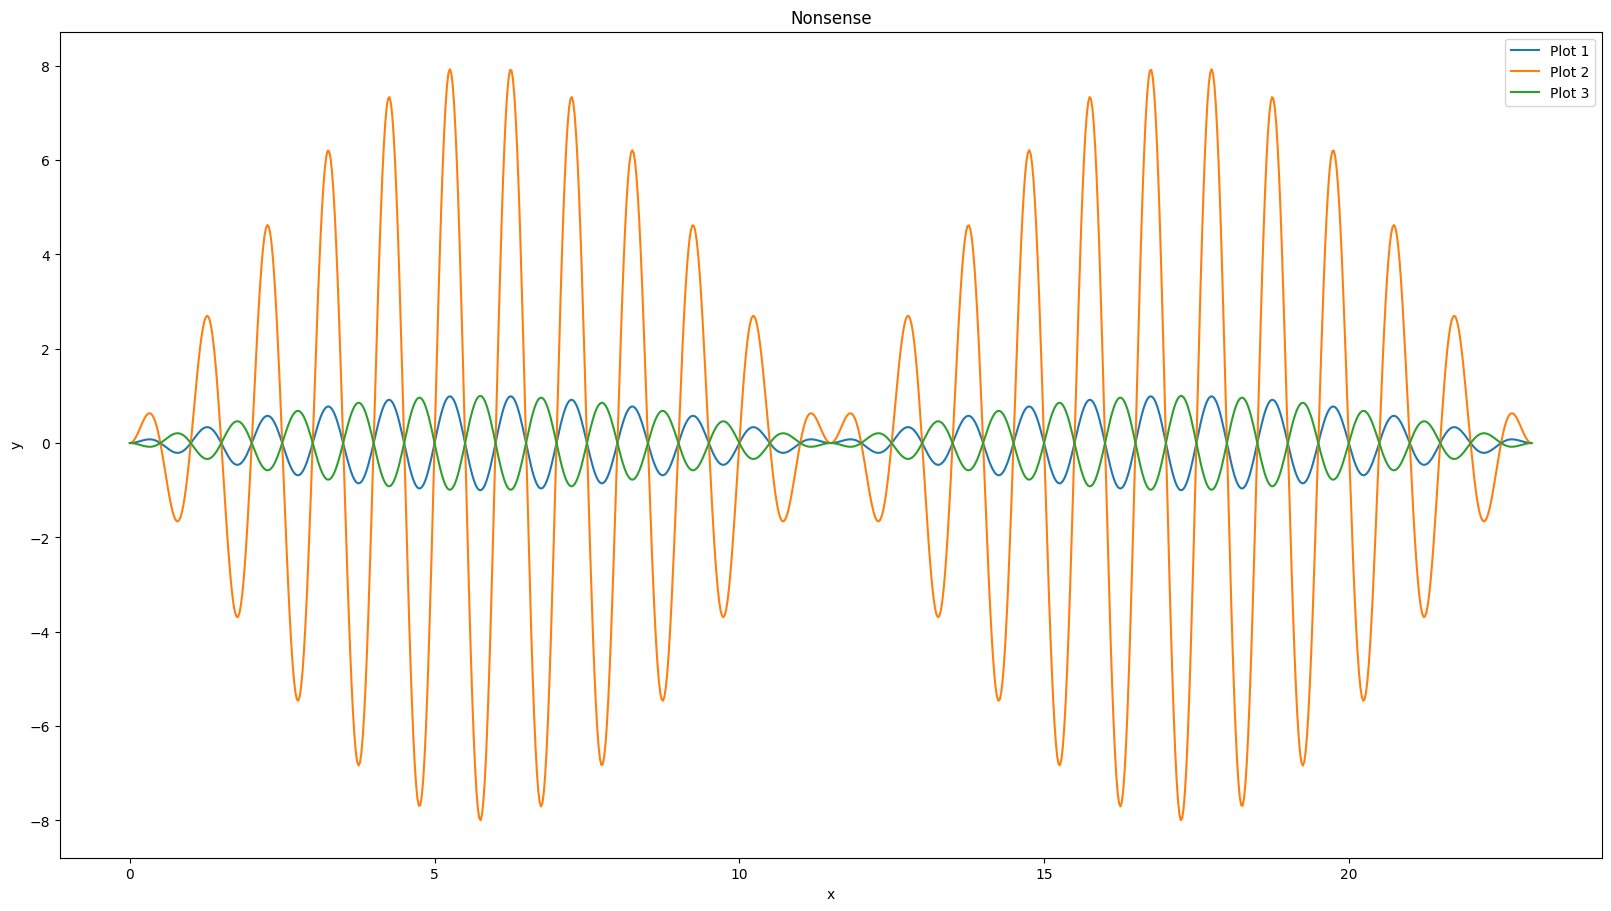

In [29]:
# Test that the plot is back to the default settings
my_plot("Nonsense", t, y1, y2, y3)

## 4b Use context manager... but as a decorator

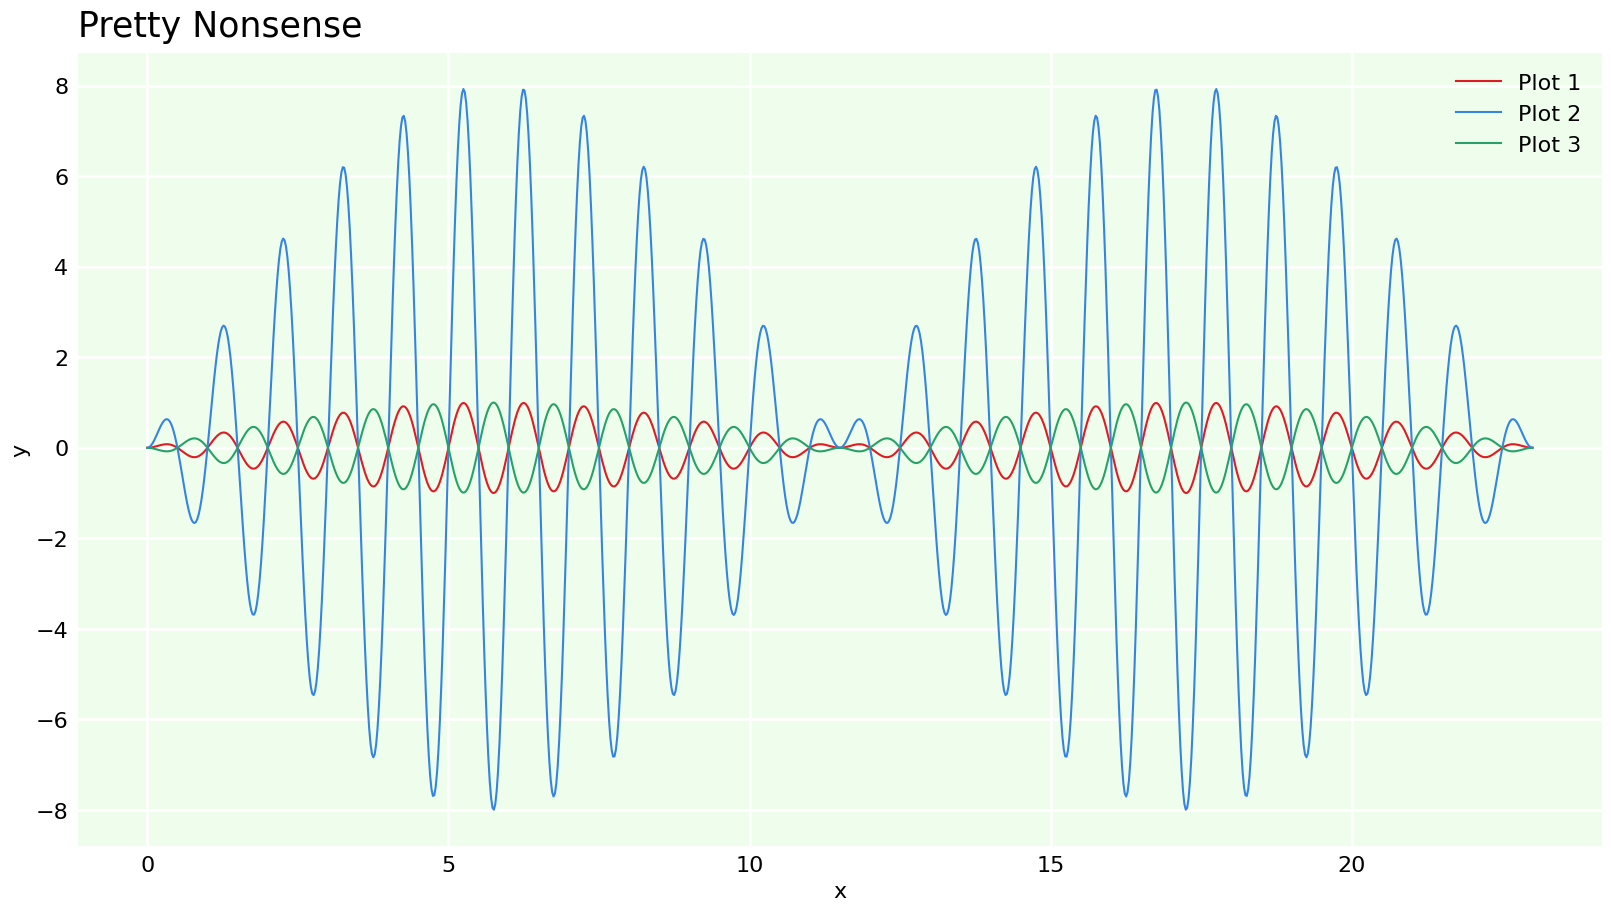

In [30]:
@mpl.rc_context(
    {
        "figure.facecolor": "#ffffff",  # white
        "font.size": 16,
        "axes.facecolor": "#effeec",
        "axes.grid": True,
        "axes.titlelocation": "left",
        "axes.titlesize": 25,
        "axes.titlepad": 12,
        "axes.spines.left": False,
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.spines.bottom": False,
        "axes.prop_cycle": cycler(
            color=[
                "#e01b24",  # red
                "#3584e4",  # blue
                "#26a269",  # green
                "#c061cb",  # purple
                "#986a44"  # brown
            ]
        ),
        "xtick.bottom": False,
        "ytick.left": False,
        "grid.color": "#ffffff",  # white
        "grid.linewidth": 2,
        "legend.frameon": False
    }
)
def my_plot_decorated(title, x, *ys):
    _, ax = plt.subplots(
        figsize=(16, 9),
        layout="constrained"
    )

    for i, y in enumerate(ys, start=1):
        ax.plot(x, y, label=f"Plot {i}")

    ax.set(
        title=f"{title}",
        xlabel="x",
        ylabel="y"
    )
    ax.legend()

my_plot_decorated("Pretty Nonsense", t, y1, y2, y3)

In [31]:
# Reset settings DOES NOT work on the decorated function!
mpl.rcdefaults()

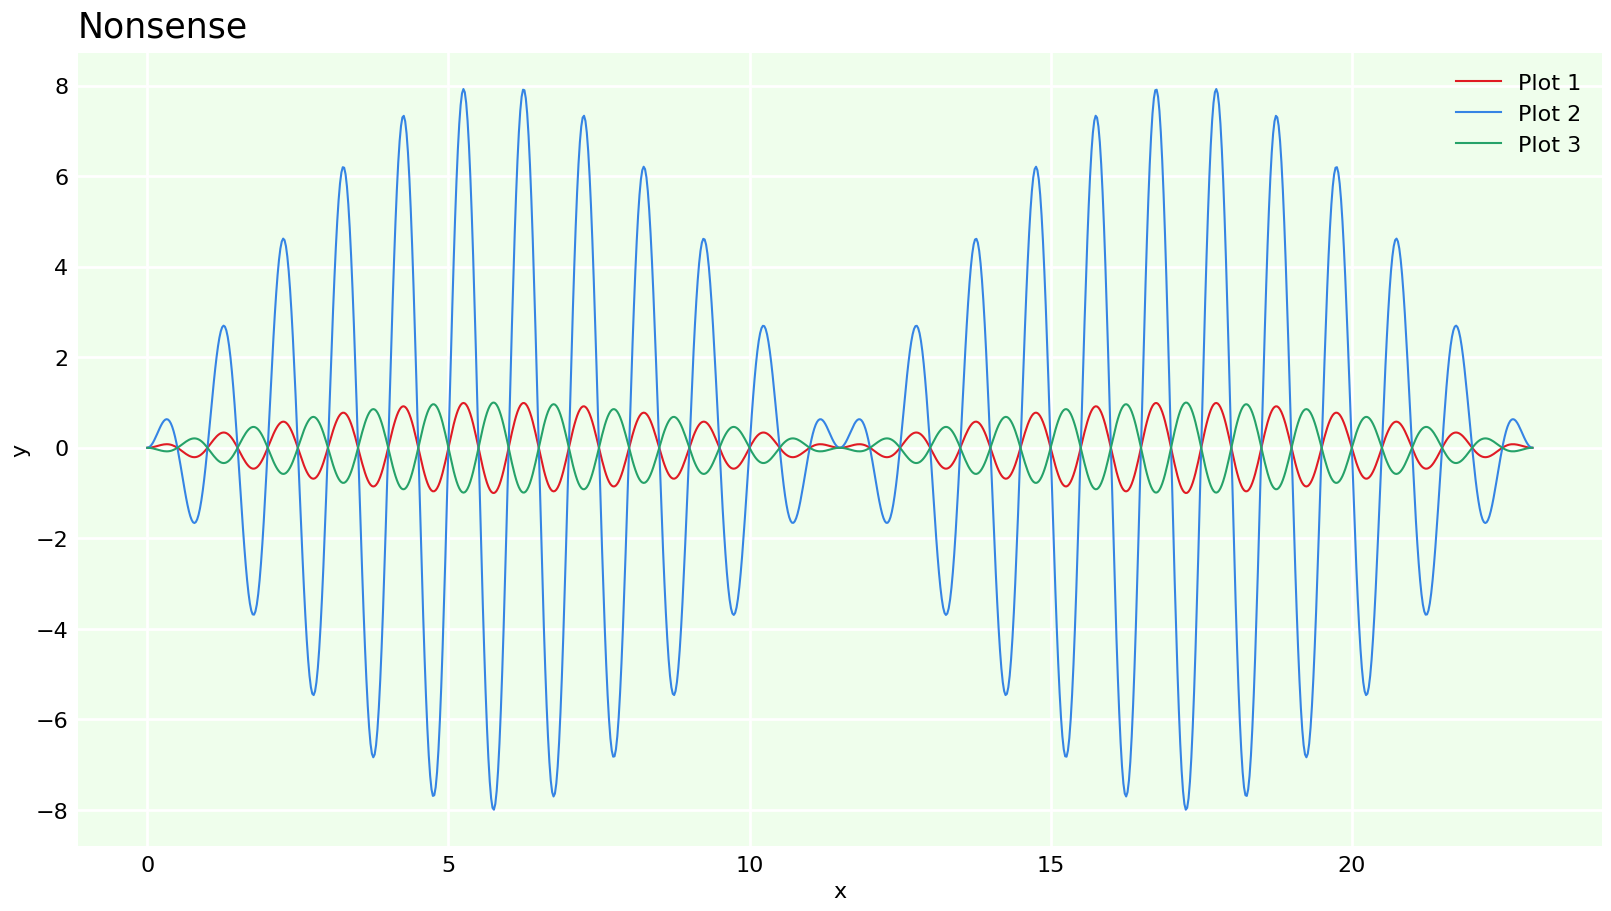

In [32]:
# The plot is still decorated
my_plot_decorated("Nonsense", t, y1, y2, y3)

## 5. Use styles

In [33]:
plt.style.use(".\styles\my_style.mplstyle")


# Inside `my_style.mplstyle` file
"""
figure.facecolor : "#ffffff"  # white

font.size : 16

# Axes settings
axes.facecolor : "#effeec"  # bright green
axes.grid : True
axes.titlelocation : "left"
axes.titlesize : 25
axes.titleweight : "bold"
axes.titlepad : 12
axes.spines.left : False
axes.spines.right : False
axes.spines.top : False
axes.spines.bottom : False
# Update colours in the cycler
axes.prop_cycle : cycler(color=["#e01b24", "#3584e4", "#26a269", "#c061cb", "#986a44"])

# Hide ticks on both axis
xtick.bottom : False
ytick.left : False

# Grid settings
grid.color : "#ffffff"  # white
grid.linewidth : 2

# Legend settings
legend.frameon : False
"""

'\nfigure.facecolor : "#ffffff"  # white\n\nfont.size : 16\n\n# Axes settings\naxes.facecolor : "#effeec"  # bright green\naxes.grid : True\naxes.titlelocation : "left"\naxes.titlesize : 25\naxes.titleweight : "bold"\naxes.titlepad : 12\naxes.spines.left : False\naxes.spines.right : False\naxes.spines.top : False\naxes.spines.bottom : False\n# Update colours in the cycler\naxes.prop_cycle : cycler(color=["#e01b24", "#3584e4", "#26a269", "#c061cb", "#986a44"])\n\n# Hide ticks on both axis\nxtick.bottom : False\nytick.left : False\n\n# Grid settings\ngrid.color : "#ffffff"  # white\ngrid.linewidth : 2\n\n# Legend settings\nlegend.frameon : False\n'

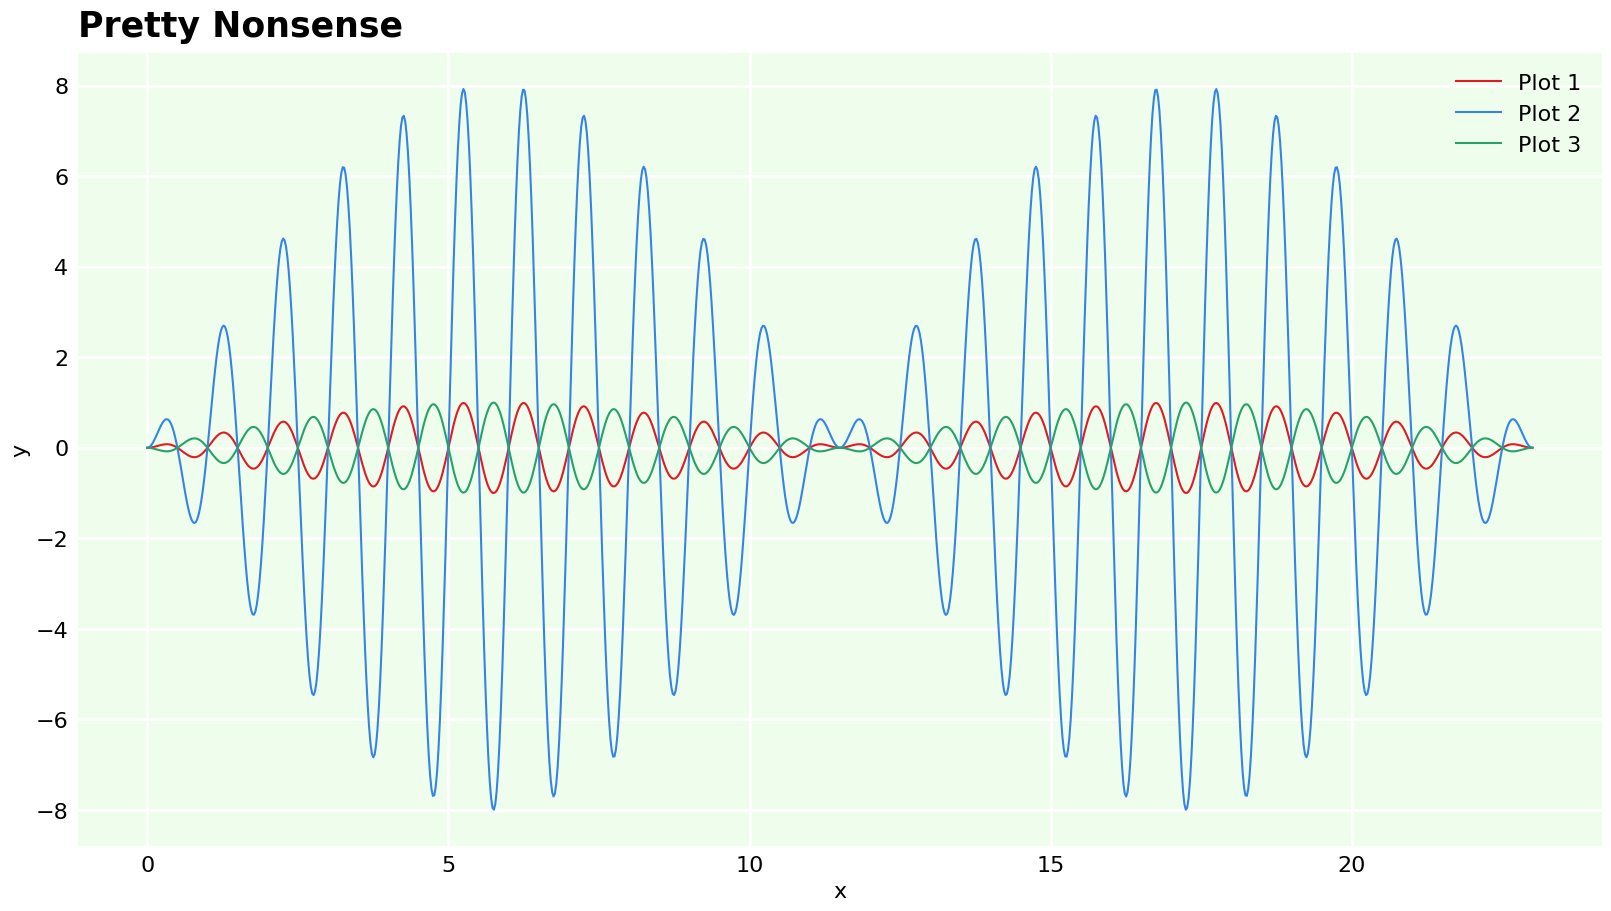

In [34]:
my_plot("Pretty Nonsense", t, y1, y2, y3)

In [35]:
# Reset settings
mpl.rcdefaults()

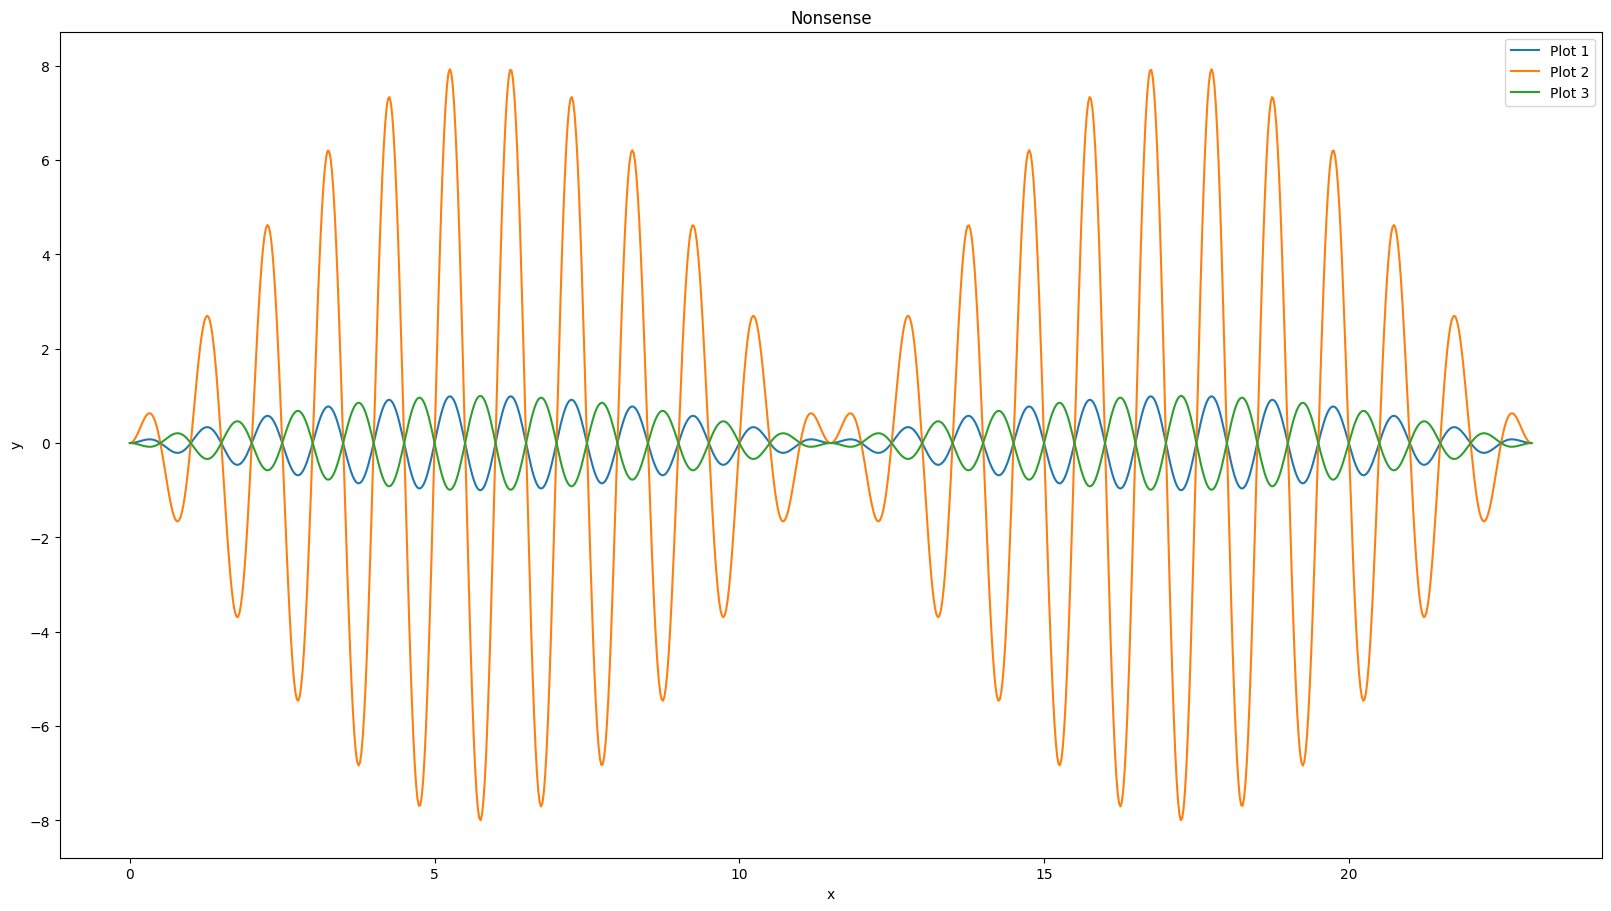

In [36]:
# Test that the plot is back to the default settings
my_plot("Nonsense", t, y1, y2, y3)

To check all available predefined styles, run the code below:

In [37]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

It's even possible to use multiple styles at once with the syntax as bellow:

`plt.style.use(['style1', 'style2'])`

**Note:** `style2` will overwrite the properties from `style1`.

https://matplotlib.org/devdocs/users/explain/customizing.html#composing-styles